### Fraction Improved under EADAM (across n for various k)

Here we look at what fraction of people improved under EADAM for various n, k. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir(r'C:\Users\v-kirdwivedi\Documents\GitHub\MatchingAlgorithm')

In [2]:
def get_data():
    df = pd.DataFrame()

    for n in [1000, 2000, 3000, 4000]:
        for k in [3,4, 5, 6]:
            df = pd.concat([df, pd.read_csv('data/simulations/max_length_matches_w_eadam/n_{}_k_{}_max_diff_eadam.csv'.format(n,k))])
            df['fraction_improved'] = df['n_changes_eadam']/df['n_matches']
    return df


In [3]:
get_data()

,Unnamed: 0,n,k,n_changes_eadam,n_matches,fraction_improved
0,0,1000,3,8,848,0.009434
1,1,1000,3,0,838,0.000000
2,2,1000,3,4,827,0.004837
3,3,1000,3,0,853,0.000000
4,4,1000,3,0,831,0.000000
...,...,...,...,...,...,...
9995,9995,4000,6,258,3705,0.069636
9996,9996,4000,6,336,3708,0.090615
9997,9997,4000,6,462,3710,0.124528
9998,9998,4000,6,246,3721,0.066111


<Axes: xlabel='n', ylabel='fraction_improved'>

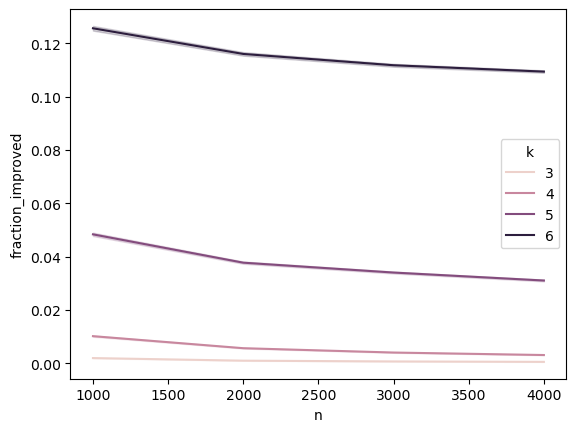

In [4]:
sns.lineplot(x='n', y='fraction_improved', hue='k', data=get_data())